DAILY COUNT OF AGGREGATED TOPIC KEYWORDS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [45]:
df_daily_count = pd.read_csv('F:/WB/Issue Monitoring/data/daily_keyword_count_new_normal.csv')
df_daily_count['date'] = pd.to_datetime(df_daily_count['date'])
df_daily_count = df_daily_count[df_daily_count['date']>='2020-05-04'].reset_index(drop=True)
df_daily_count['date'] = df_daily_count['date'].apply(lambda x: '2020-'+str(x.month)+'-'+str(x.day))

In [25]:
len(df_daily_count['date'].unique())

41

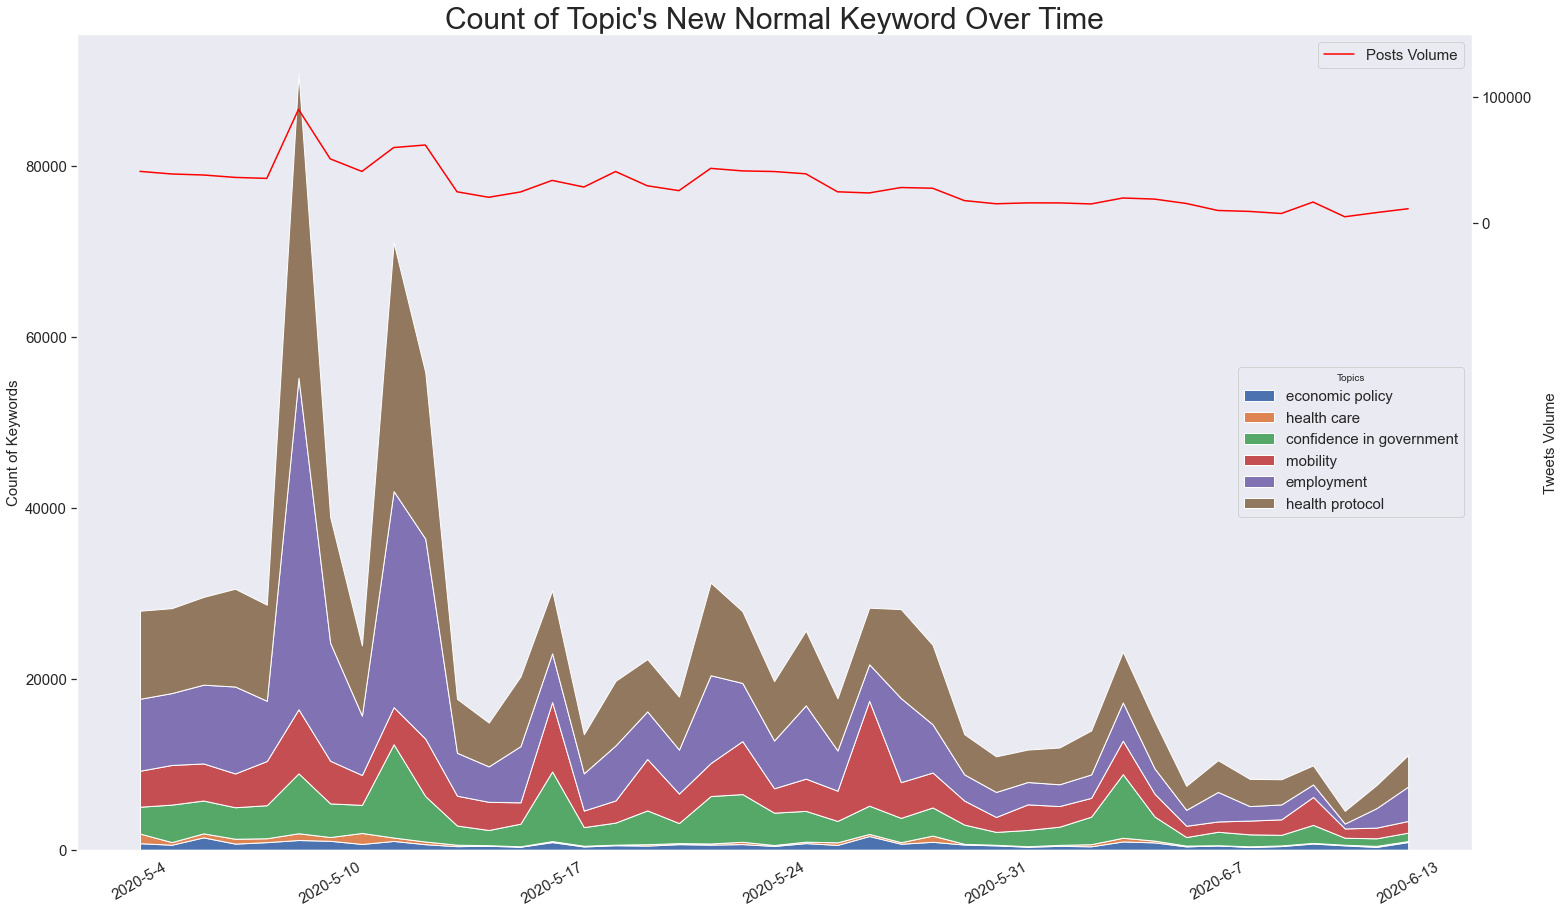

In [54]:
legend = []
yy = []
for topic in list(df_daily_count['topic'].unique()):
    df_temp = df_daily_count[df_daily_count.topic==topic]
    legend.append(topic)
    yy.append(df_temp['count'].to_list())

x = df_temp['date'].to_list()
y = np.vstack(yy)
fig, ax1 = plt.subplots(figsize=(25,15))
plt.title("Count of Topic's New Normal Keyword Over Time",fontsize=30)
ax1.stackplot(x, y, labels=legend)

ax2 = ax1.twinx()
ax2.plot(x,df_daily_count[df_daily_count.topic=='economic policy']['tweets_volume'].to_list(),color='red')

ax1.grid()
ax2.grid(False)
ax1.set_ylabel('Count of Keywords',fontsize=15)
ax1.tick_params(axis='x', rotation=30,labelsize=15)
ax1.tick_params(axis='y',labelsize=15)
ax1.legend(legend,loc='center right',title="Topics",fancybox=True,fontsize=15)
xticks = ax1.xaxis.get_major_ticks()
remove_date = [i for i in range(len(df_daily_count['date'].unique())) if i not in [0,6,13,20,27,34,40]]
for i in remove_date:
    xticks[i].set_visible(False)
ax2.set_ylabel('Tweets Volume',fontsize=15)
ax2.set_ylim([-500000,150000])
ax2.tick_params(axis='y',labelsize=15)
yticks = ax2.yaxis.get_major_ticks()
yticks[0].set_visible(False)
yticks[1].set_visible(False)
yticks[2].set_visible(False)
yticks[3].set_visible(False)
yticks[4].set_visible(False)
ax2.legend(['Posts Volume'],loc='upper right',fontsize=15)
plt.xlabel('Date')
plt.show()
fig.savefig('chart_output/daily_keyword_count_new_normal.png', dpi=fig.dpi)